In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
df = pd.read_csv(r'D:\Study Materials\[Coding Ninjas] Machine Learning and Data Science\[Coding Ninjas] Machine Learning and Data Science\50. RNN\12.1 Preparing Data For RNN\international-airline-passengers.csv')
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
df.drop('Month',axis=1,inplace=True)

In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int(values.shape[0]*0.67)
test_size = values.shape[0] - train_size
train = values[:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
def create_datset(data,k):
    datax, datay = [], []
    for i in range(data.shape[0]-k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        datax.append(x)
        datay.append(y)
    return np.array(datax), np.array(datay)

In [7]:
look_back = 12
train_x, train_y = create_datset(train,look_back)
test_x, test_y = create_datset(test,look_back)
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)
train_x.shape, train_y.shape

((84, 12, 1), (84,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM
model = Sequential()
model.add(LSTM(100,input_shape=(look_back,1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(train_x,train_y,epochs=150,batch_size=2)

Epoch 1/150
42/42 [==============================] - 24s 6ms/step - loss: 0.0365
Epoch 2/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 3/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 4/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0174
Epoch 5/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 6/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 8/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 9/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 10/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 11/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 12/150
42/42 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 13/150
42/42 [================

In [11]:
test_predict = model.predict(test_x)
test_predict = scaler.inverse_transform(test_predict)
test_predict

2/2 [==============================] - 0s 3ms/step


array([[361.45105],
       [369.9575 ],
       [370.16278],
       [393.92023],
       [408.58347],
       [449.58133],
       [503.4129 ],
       [519.5526 ],
       [483.0049 ],
       [374.96338],
       [338.43387],
       [332.4475 ],
       [366.68515],
       [382.15073],
       [384.38174],
       [421.6957 ],
       [449.17944],
       [506.18738],
       [546.54846],
       [544.7227 ],
       [469.14108],
       [364.30646],
       [344.66156],
       [355.99814],
       [401.69565],
       [416.43475],
       [423.75204],
       [450.0323 ],
       [493.61316],
       [529.37695],
       [570.5662 ],
       [578.81396],
       [494.04263],
       [377.85992],
       [361.27975],
       [363.95148]], dtype=float32)

In [12]:
train_predict = model.predict(train_x)
train_predict = scaler.inverse_transform(train_predict)
train_predict

3/3 [==============================] - 0s 3ms/step


array([[129.1483 ],
       [130.07918],
       [135.43211],
       [142.13962],
       [143.66252],
       [146.74492],
       [160.93825],
       [168.18906],
       [158.16165],
       [143.18979],
       [131.66785],
       [130.0939 ],
       [144.71754],
       [150.68248],
       [155.02638],
       [168.6226 ],
       [169.76483],
       [186.5514 ],
       [195.79965],
       [195.75374],
       [179.70836],
       [163.6603 ],
       [159.28111],
       [163.05891],
       [176.29872],
       [181.72987],
       [189.55322],
       [196.97234],
       [200.37051],
       [208.58324],
       [230.43721],
       [229.46037],
       [219.89166],
       [194.13046],
       [189.14774],
       [189.87003],
       [203.98595],
       [207.91763],
       [210.86525],
       [230.53188],
       [243.77238],
       [261.18085],
       [271.44217],
       [267.83945],
       [246.55092],
       [222.23085],
       [217.84438],
       [216.0257 ],
       [229.29022],
       [230.556  ],


In [13]:
train_true = scaler.inverse_transform([train_y]).ravel()
train_true

array([115.00000165, 125.99999813, 140.99999835, 135.00000194,
       125.0000018 , 148.99999662, 170.00000245, 170.00000245,
       157.99999122, 133.00000007, 113.99999611, 140.00000201,
       145.00000209, 150.00000216, 177.99999151, 162.99999129,
       171.99999511, 177.99999151, 199.00000655, 199.00000655,
       184.00000633, 161.99999496, 145.99999842, 165.9999987 ,
       170.99999878, 180.00000259, 192.99999173, 180.99999892,
       182.99999158, 217.99999209, 230.00000331, 241.99999611,
       209.00000669, 190.99999906, 171.99999511, 194.00000648,
       195.99999914, 195.99999914, 235.99999971, 235.00000338,
       229.00000698, 242.99999245, 263.99999827, 272.00000576,
       236.99999604, 210.99999935, 180.00000259, 200.99999921,
       204.00000662, 187.99999165, 235.00000338, 226.9999959 ,
       234.00000705, 263.99999827, 302.00000619, 292.99998396,
       258.9999982 , 229.00000698, 202.99999187, 229.00000698,
       241.99999611, 232.9999923 , 267.00000568, 268.99

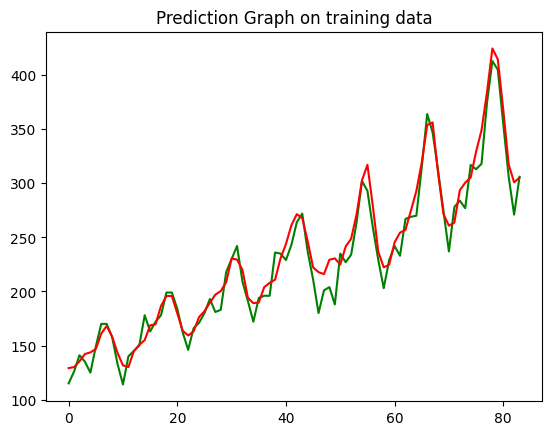

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_true,color='green')
plt.plot(train_predict,color='red')
plt.title("Prediction Graph on training data")
plt.show()

In [15]:
test_predict = model.predict(test_x)
test_predict = scaler.inverse_transform(test_predict)


2/2 [==============================] - 0s 8ms/step


In [16]:
test_true = scaler.inverse_transform([test_y]).ravel()

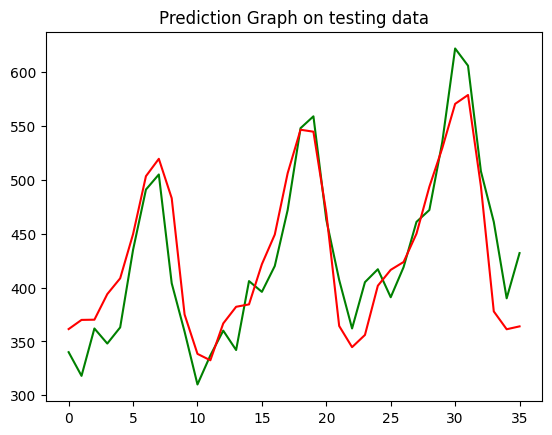

In [18]:
plt.plot(test_true,color='green')
plt.plot(test_predict,color='red')
plt.title("Prediction Graph on testing data")
plt.show()

In [19]:
test_x.shape

(36, 12, 1)

In [20]:
train_x.shape

(84, 12, 1)